In [35]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

import glob
import random
import datetime
import tensorflow as tf
from shutil import rmtree
from keras.models import load_model
from os.path import join, getctime, basename
from models import *
from utils import *
from data_preprocess import load_prep_data

%load_ext autoreload
%autoreload 2

aug_data = load_prep_data(time=500, debug=True, onehot=True)
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape of x_train set: (6960, 22, 250)
Shape of y_train labels: (6960,)
Shape of x_valid set: (1500, 22, 250)
Shape of y_valid labels: (1500,)
Shape of X_test_prep set: (1772, 22, 250)
Shape of y_test_prep labels: (1772,)
Shape of y_train labels after categorical conversion: (6960, 4)
Shape of y_valid labels after categorical conversion: (1500, 4)
Shape of y_test labels after categorical conversion: (1772, 4)


In [36]:
input_shape = x_train.shape
x_train = tf.transpose( tf.expand_dims(x_train, axis=-1), perm=[0, 2, 3, 1])
x_valid = tf.transpose( tf.expand_dims(x_valid, axis=-1), perm=[0, 2, 3, 1])

print("x_train.shape: {}", format(x_train.shape))

x_train.shape: {} (6960, 250, 1, 22)


## 2 Layers CNN + LSTM

In [37]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2],1, input_shape[1]),
    'epochs': 50,
    'dropout': 0.5,
    'batch_size': 640
}
CNN2LayerLSTM = CNN2LayerLSTM()
CNN2LayerLSTM.build_model(config)
history = CNN2LayerLSTM.train(x_train, y_train, x_valid, y_valid, config, get_workpath('CNN2LayerLSTM'))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 248, 1, 25)        1675      
                                                                 
 batch_normalization_28 (Ba  (None, 248, 1, 25)        992       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 83, 1, 25)         0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 83, 1, 25)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 77, 1, 32)         5632      
                                                                 
 batch_normalization_29 (Ba  (None, 77, 1, 32)        

In [38]:
x_test_transposed = tf.transpose(tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = CNN2LayerLSTM.evaluate(x_test_transposed, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better('CNN2LayerLSTM', np.mean(raw[1]), CNN2LayerLSTM, config)

56/56 [==============================] - 0s 7ms/step - loss: 1.1850 - accuracy: 0.5333
Raw Acc result: 0.5332956910133362
No existing model in specified path. Saving the new model


True

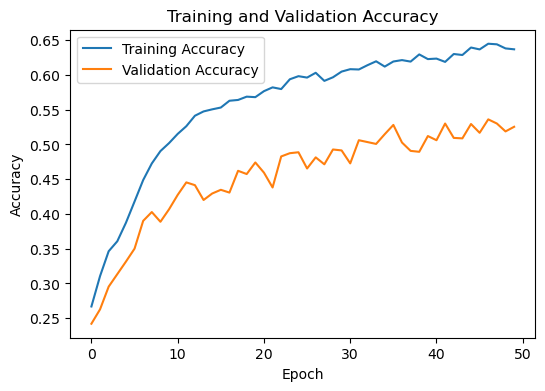

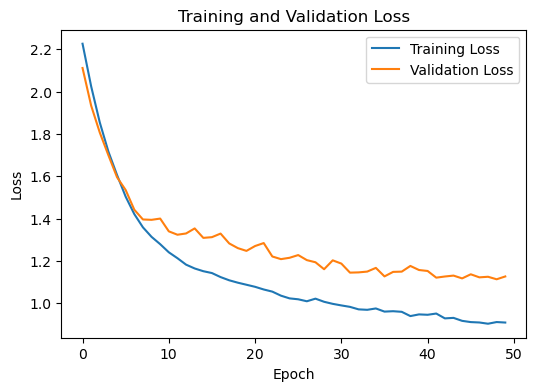

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4 Layers CNN + LSTM

In [40]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2],1, input_shape[1]),
    'epochs': 50,
    'dropout': 0.5,
    'batch_size': 640
}
CNN4LayerLSTM = CNN4LayerLSTM()
CNN4LayerLSTM.build_model(config)
history = CNN4LayerLSTM.train(x_train, y_train, x_valid, y_valid, config, get_workpath('CNN4LayerLSTM'))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 250, 1, 25)        13775     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 84, 1, 25)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_32 (Ba  (None, 84, 1, 25)         100       
 tchNormalization)                                               
                                                                 
 dropout_32 (Dropout)        (None, 84, 1, 25)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 84, 1, 50)         31300     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 28, 1, 50)        

In [41]:
x_test_transposed = tf.transpose(tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = CNN4LayerLSTM.evaluate(x_test_transposed, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better('CNN4LayerLSTM', np.mean(raw[1]), CNN4LayerLSTM, config)

56/56 [==============================] - 0s 6ms/step - loss: 1.0045 - accuracy: 0.5982
Raw Acc result: 0.5981941223144531
No existing model in specified path. Saving the new model


True

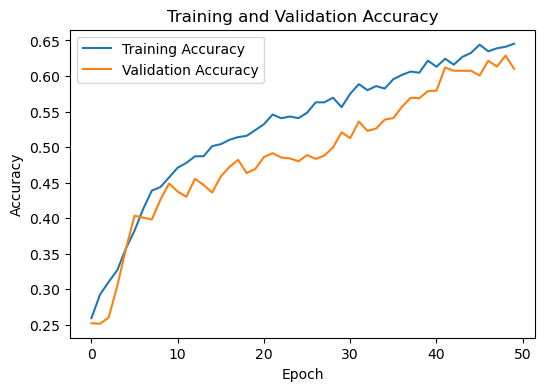

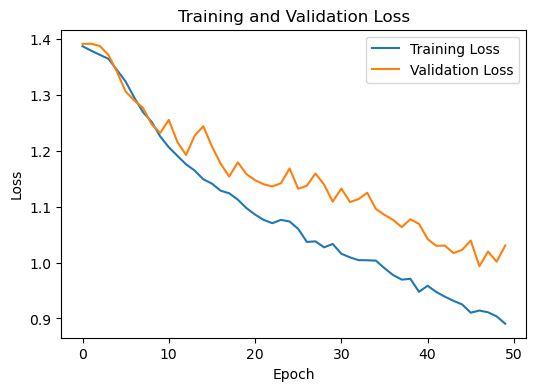

In [42]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()